In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from matplotlib import colors

def hsv2rgb(h, s, v):
    return colors.hsv_to_rgb((h, s, v))

def gradient_rgb_bw(v):
    return (v, v, v)

def gradient_rgb_gbr(v):
    if v < 0.5:
        return (0, 1 - 2*v, 2*v)
    else:
        return (2*(v - 0.5), 0, 1 - 2*(v - 0.5))

def gradient_rgb_gbr_full(v):
    if v < 0.25:
        return (0, 1, 4*v)
    elif v < 0.5:
        return (0, 1 - 4*(v - 0.25), 1)
    elif v < 0.75:
        return (4*(v - 0.5), 0, 1)
    else:
        return (1, 0, 1 - 4*(v - 0.75))

def gradient_rgb_wb_custom(v):
    if v < 0.14:
        return (1, 1 - 7.14*v, 1)
    elif v < 0.28:
        return (1 - 7.14*(v - 0.14), 0, 1)
    elif v < 0.42:
        return (0, 7.14*(v - 0.28), 1)
    elif v < 0.57:
        return (0, 1, 1 - 7.14*(v - 0.42))
    elif v < 0.71:
        return (7.14*(v - 0.57), 1, 0)
    elif v < 0.85:
        return (1, 1 - 7.14*(v - 0.71), 0)
    else:
        return (1 - 7.14*(v - 0.85), 0, 0)

def gradient_hsv_bw(v):
    return hsv2rgb(0, 0, v)

def gradient_hsv_gbr(v):
    h = (120 + (v * 240)) / 360
    return hsv2rgb(h, 1, 1)

def gradient_hsv_unknown(v):
    h = (120 - (v * 120)) / 360
    return hsv2rgb(h, 0.5, 1)

def gradient_hsv_custom(v):
    h = v
    s = 1 - v
    return hsv2rgb(h, s, 1)


# Funkcje do generowania gradientów kolorów
Powyższy kod zawiera funkcje, które generują różne gradienty kolorów na podstawie wartości wejściowej `v`, która zmienia się od 0 do 1. Gradienty te są tworzone w przestrzeniach RGB i HSV.

In [2]:
def plot_color_gradients(gradients, names):
    rc('legend', fontsize=10)

    column_width_pt = 400
    pt_per_inch = 72
    size = column_width_pt / pt_per_inch

    fig, axes = plt.subplots(nrows=len(gradients), sharex=True, figsize=(size, 0.75 * size))
    fig.subplots_adjust(top=1.00, bottom=0.05, left=0.25, right=0.95)

    for ax, gradient, name in zip(axes, gradients, names):
        img = np.zeros((2, 1024, 3))
        for i, v in enumerate(np.linspace(0, 1, 1024)):
            img[:, i] = gradient(v)

        im = ax.imshow(img, aspect='auto')
        im.set_extent([0, 1, 0, 1])
        ax.yaxis.set_visible(False)

        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.25
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='left', fontsize=10)

    fig.savefig('my-gradients.pdf')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


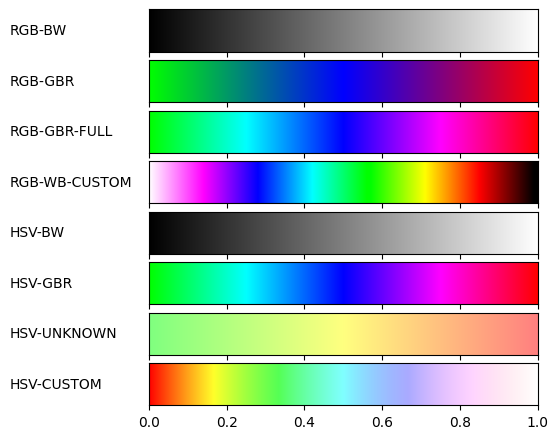

In [3]:
gradients = (gradient_rgb_bw, gradient_rgb_gbr, gradient_rgb_gbr_full, gradient_rgb_wb_custom,
                 gradient_hsv_bw, gradient_hsv_gbr, gradient_hsv_unknown, gradient_hsv_custom)

def toname(g):
    return g.__name__.replace('gradient_', '').replace('_', '-').upper()

plot_color_gradients(gradients, [toname(g) for g in gradients])